In [39]:
from glob import glob
import pandas as pd

In [40]:
files = glob('../data/out/**/*.nq')

In [41]:
len(files)

21

In [42]:
files[:2]

['../data/out/2019/dpef.html-microdata.nq-00759.nq',
 '../data/out/2019/dpef.html-microdata.nq-02263.nq']

In [43]:
files = pd.DataFrame([(f, int(f.split('/')[3]), f.split('/')[4].replace('.nq', '')) for f in files], 
             columns=['path', 'year', 'id'])

In [44]:
files.year.value_counts()

2021    9
2020    9
2019    3
Name: year, dtype: int64

In [45]:
def line_count(fpath):
    with open(fpath) as f:
        return len(list(f))

files['line_count'] = [line_count(f) for f in files.path]

In [46]:
files['has_nq'] = files.line_count != 0

<AxesSubplot: >

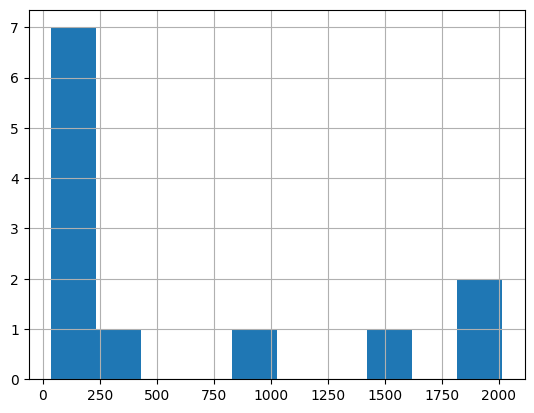

In [47]:
files[files.has_nq].line_count.hist()

In [52]:
def error_count(fpath):
    with open(fpath) as f:
        part_count = {k: 0 for k in range(5)}
        for l in f:
            parts = l.strip().split('!_SEP_!')
            part_count[len(parts)] += 1
            if len(parts) != 4:
                print(l)
            
        return fpath, part_count

[error_count(f) for f in files[files.has_nq].path]

https://www.diziler.com/haber/16-subat-2017-persembe-reyting-sonuclari-14421!_SEP_!http://schema.org/articleBody!_SEP_!

Cesur ve Güzel mi, Vatanım Sensin mi, Ölene Kadar mı, Cesur Yürek mi?

Ekranlarda Perşembe gününün galibi hangi yapım oldu?

Diziler.com ekibi olarak dünün görünümünü sizler için derledik.

TÜM KİŞİLERDE YİNE 'VATANIM SENSİN'

Tüm kişilerde dizi kategorisinde bu haftanın birincisi bir kez daha Kanal D'nin ilgiyle takip edilen dönem dizisi Vatanım Sensin oldu. Cesur ve Güzel bu dizinin yakın takipçisi olmayı sürdürüyor.

Cesur Yürek bir sıra yükselerek 7. ve birkaç sıra yükselen Ölene Kadar ise 19. sırada günü tamamladı.



AB'DE 'VATANIM SENSİN' FARKI!

Vatanım Sensin daha yüksek izlenme oranları yakaladığı AB kategorisindeki birinciliğini sürdürdü ve bu hafta da zirvede yer aldı. Cesur ve Güzel bu dizinin yine yakın takipçisi.

Ölene Kadar 12. ve Cesur Yürek 13. sırada günü tamamladılar.

Günün detaylı reyting analizi ve ilk 100 sıralaması için tıklayınız: http://ww

[('../data/out/2021/dpef.html-microdata.nq-01774.nq',
  {0: 0, 1: 65, 2: 1, 3: 2, 4: 58}),
 ('../data/out/2021/dpef.html-embedded-jsonld.nq-02572.nq',
  {0: 0, 1: 10, 2: 5, 3: 4, 4: 977}),
 ('../data/out/2021/dpef.html-microdata.nq-00203.nq',
  {0: 0, 1: 28, 2: 1, 3: 1, 4: 27}),
 ('../data/out/2021/dpef.html-microdata.nq-06129.nq',
  {0: 0, 1: 161, 2: 4, 3: 5, 4: 96}),
 ('../data/out/2021/dpef.html-embedded-jsonld.nq-04658.nq',
  {0: 0, 1: 79, 2: 7, 3: 7, 4: 1460}),
 ('../data/out/2020/dpef.html-microdata.nq-01813.nq',
  {0: 0, 1: 66, 2: 1, 3: 2, 4: 40}),
 ('../data/out/2020/dpef.html-rdfa.nq-01605.nq',
  {0: 0, 1: 0, 2: 0, 3: 0, 4: 210}),
 ('../data/out/2020/dpef.html-embedded-jsonld.nq-03624.nq',
  {0: 0, 1: 166, 2: 18, 3: 18, 4: 1812}),
 ('../data/out/2020/dpef.html-embedded-jsonld.nq-04380.nq',
  {0: 0, 1: 72, 2: 6, 3: 6, 4: 1829}),
 ('../data/out/2020/dpef.html-microdata.nq-00149.nq',
  {0: 0, 1: 97, 2: 4, 3: 3, 4: 49}),
 ('../data/out/2020/dpef.html-microdata.nq-03066.nq',
  {0: 

In [33]:
def subject_count(fpath):
    with open(fpath) as f:
        subjects = []
        for l in f:
            parts = l.split('\t')
            if len(parts) >= 3, f'found {len(parts)} in {l}'
            subjects.append(parts[0])
        return len(set(subjects))

[subject_count(f) for f in files[files.has_nq].path]

AssertionError: found 1 in By Jack Barnes
